# KERAKLI BARCHA KUTIBXONALARNI CHAQIRIB OLAMIZ:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, jaccard_score
from sklearn import metrics
from sklearn.cluster import KMeans

# TRAIN.CSV NI O'QIB OLAMIZ VA BOSHLANG'ICH TAHLILNI BOSHLAYMIZ:

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


In [ ]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(['Surname', 'CustomerId'], axis=1, inplace=True)

SURNAME VA CUSTOMERID USTUNLARI TASHLAB YUBORILDI, CHUNKI ULAR MODELGA TASIR QILMAYDI. ENDI 2 TA CATEGORICAL USTUNLARNI LABEL VA ONEHOT ENCODING QILAMIZ. SO'NGRA TRAIN VA TESTLARGA AJRATAMIZ.

In [ ]:
la_encoder = LabelEncoder()
df.Gender = la_encoder.fit_transform(df.Gender)

In [ ]:
df.Geography.value_counts()

,count
Geography,
France,9040
Spain,3280
Germany,2680


In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(df[['Geography']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Geography']))
df = df.drop('Geography', axis=1)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)
df

,id,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0,567.0,1,33.0,9.0,0.00,2.0,1.0,0.0,156792.89,0.0,0.0,0.0
1,1,628.0,0,38.0,3.0,0.00,1.0,1.0,1.0,51987.99,1.0,0.0,0.0
2,2,635.0,0,29.0,3.0,0.00,2.0,1.0,1.0,113079.19,0.0,0.0,0.0
3,3,681.0,1,28.0,6.0,0.00,2.0,1.0,0.0,14081.64,0.0,0.0,0.0
4,4,587.0,0,27.0,5.0,0.00,2.0,1.0,0.0,158958.90,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,581.0,1,35.0,1.0,0.00,2.0,1.0,0.0,161653.50,0.0,0.0,0.0
14996,14996,806.0,1,42.0,1.0,129120.64,2.0,1.0,1.0,161642.08,0.0,1.0,0.0
14997,14997,620.0,0,29.0,7.0,0.00,2.0,1.0,1.0,161579.85,0.0,0.0,0.0
14998,14998,622.0,1,51.0,6.0,106070.89,3.0,1.0,0.0,136869.31,1.0,1.0,0.0


In [ ]:
df.corrwith(df['Exited']).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.449425
NumOfProducts,0.312812
Geography_Germany,0.242651
IsActiveMember,0.188748
Gender,0.169465
Balance,0.160062
Geography_Spain,0.061859
CreditScore,0.052375
EstimatedSalary,0.035193


In [ ]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# MODELLAR YARATAMIZ:

Model aniqligi:  0.8913333333333333
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2424
         1.0       0.76      0.64      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.80      0.81      3000
weighted avg       0.89      0.89      0.89      3000

[[2305  119]
 [ 207  369]]


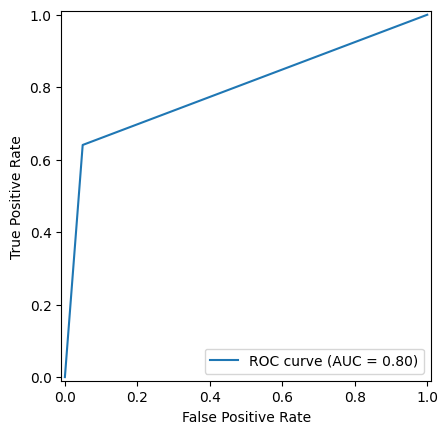

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.8346666666666667
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      2424
         1.0       0.56      0.61      0.59       576

    accuracy                           0.83      3000
   macro avg       0.74      0.75      0.74      3000
weighted avg       0.84      0.83      0.84      3000

[[2150  274]
 [ 222  354]]


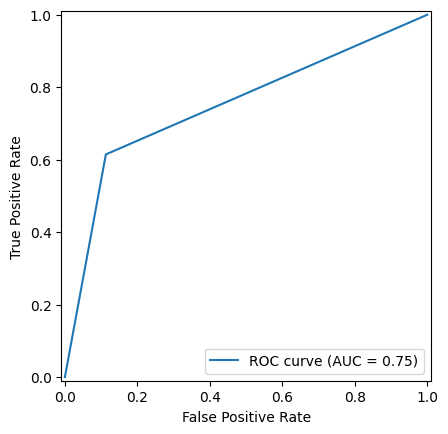

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

y_predict = tree_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.888
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2424
         1.0       0.73      0.66      0.69       576

    accuracy                           0.89      3000
   macro avg       0.83      0.80      0.81      3000
weighted avg       0.88      0.89      0.89      3000

[[2282  142]
 [ 194  382]]


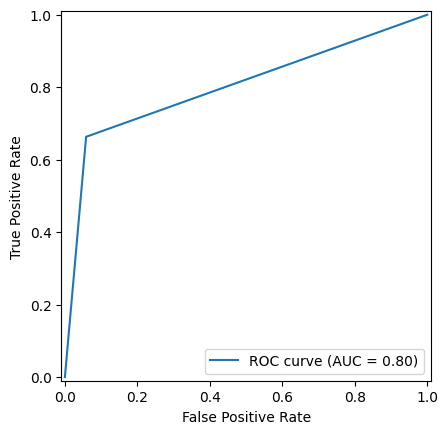

In [ ]:
xbg_model = XGBClassifier()
xbg_model.fit(x_train, y_train)

y_pre = xbg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_pre))
print(classification_report(y_test, y_pre))
print(confusion_matrix(y_test, y_pre))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pre)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.873
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      2424
         1.0       0.73      0.53      0.62       576

    accuracy                           0.87      3000
   macro avg       0.81      0.74      0.77      3000
weighted avg       0.86      0.87      0.87      3000

[[2311  113]
 [ 268  308]]


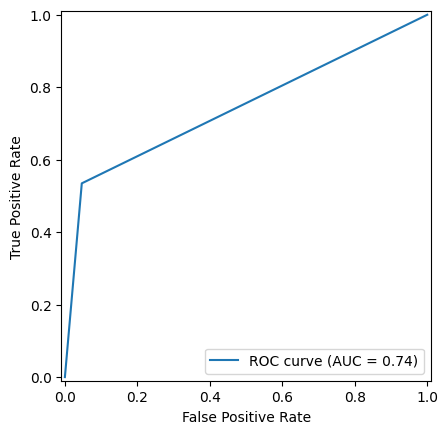

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

y_predicttt = lg_model.predict(x_test)

print("Model aniqligi: ", metrics.accuracy_score(y_test, y_predicttt))
print(classification_report(y_test, y_predicttt))
print(confusion_matrix(y_test, y_predicttt))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicttt)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Model aniqligi:  0.893
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2424
         1.0       0.77      0.63      0.69       576

    accuracy                           0.89      3000
   macro avg       0.84      0.79      0.81      3000
weighted avg       0.89      0.89      0.89      3000

[[2316  108]
 [ 213  363]]


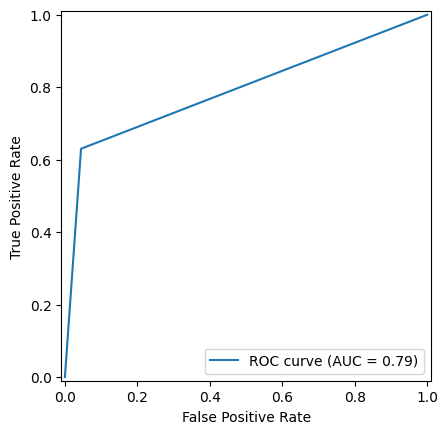

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

y_p = svc_model.predict(x_test)

print("Model aniqligi: ", accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))
print(confusion_matrix(y_test, y_p))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_p)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# 5 TA MODEL ORQALI BASHORAT QILIB KO'RDIM, ENG YAXSHI NATIJA SUPPORT VECTOR MACHINE BO'LDI. ACCURACY : 0,893 YA'NI 89,3 FOIZ VA O'YLAYMANKI BU NORM NATIJA. ENDI SHU MODELNI TEST DF GA CHURISH QOLDI XOLOS.

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.drop(['Surname', 'CustomerId'], axis=1, inplace=True)
test_df.Gender = la_encoder.fit_transform(test_df.Gender)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(test_df[['Geography']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Geography']))
test_df = test_df.drop('Geography', axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
customer_idlari = test_df['id']

In [ ]:
new_test_df = scaler.transform(test_df)

In [ ]:
y_final = svc_model.predict(new_test_df)

In [ ]:
submission_df = pd.DataFrame({'id': customer_idlari, 'Exited': y_final})
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df.head(15)

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,0.0
4,15004,0.0
5,15005,0.0
6,15006,0.0
7,15007,0.0
8,15008,0.0
9,15009,1.0
